In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [19]:
#1-(a)
samples = np.random.normal(size=500)
#print(samples)

In [20]:
#1-(b)
sample_center = np.median(samples)
sample_center

0.03135653590200273

In [37]:
#1-(c)
lstd = stats.norm.std(samples)
print(std)

1.0684647838274342


In [27]:
#1-(d)
stats.scoreatpercentile(samples,80)

0.840173378017435

In [38]:
#1-(e)
loc, std = stats.norm.fit(samples)
print(loc)
print(std)

-0.015079608907554092
1.0684647838274342


In [28]:
from scipy import linalg
arr = np.array([[1,3,5], [2,4,6], [6,5,8]])
#2-(a)
linalg.det(arr)


-7.999999999999992

In [29]:
#2-(b)
linalg.inv(arr)


array([[-0.25 , -0.125,  0.25 ],
       [-2.5  ,  2.75 , -0.5  ],
       [ 1.75 , -1.625,  0.25 ]])

In [30]:
arr2 = np.array([[1,2,3,4], [3,8,5,2], [4,3,6,2]])
#3
linalg.det(arr2)
#square marlix가 아니기 때문에 에러가 난다.

ValueError: expected square matrix

In [47]:
#4
A = np.array([[2,2,2], [4,7,7], [6,18,22]])
U = np.identity(3)
print('A = \n'+str(A))
np.copyto(U,A)

U[1] = U[1] + (-2) *U[0]
E_21 = np.identity(3)
E_21[1,0] = -2
print('E_21 = \n'+str(E_21))
print('U = \n'+str(U))

U[2] = U[2] + (-3) *U[0]
E_31 = np.identity(3)
E_31[2,0] = -3
print('E_31 = \n'+str(E_31))
print('U = \n'+str(U))

U[2] = U[2] + (-4) *U[1]
E_32 = np.identity(3)
E_32[2,1] = -4
print('E_32 = \n'+str(E_32))
print('U = \n'+str(U))

'''
A=LU
E_32*E_31*E21*A = U
A=inv(E_32*E_31*E_21)U

L = inv(E_32*E_31*E_21)
'''
L = np.linalg.inv(np.matmul(np.matmul(E_32, E_31), E_21))
print('L = \n'+str(L))
print('LU = \n'+str(np.matmul(L,U)))

A = 
[[ 2  2  2]
 [ 4  7  7]
 [ 6 18 22]]
E_21 = 
[[ 1.  0.  0.]
 [-2.  1.  0.]
 [ 0.  0.  1.]]
U = 
[[ 2.  2.  2.]
 [ 0.  3.  3.]
 [ 6. 18. 22.]]
E_31 = 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-3.  0.  1.]]
U = 
[[ 2.  2.  2.]
 [ 0.  3.  3.]
 [ 0. 12. 16.]]
E_32 = 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -4.  1.]]
U = 
[[2. 2. 2.]
 [0. 3. 3.]
 [0. 0. 4.]]
L = 
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 4. 1.]]
LU = 
[[ 2.  2.  2.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]


In [49]:
#5
A = np.array([[2,2,2], [4,7,7], [6,18,22]])
U = np.identity(3)
print('A = \n'+str(A))

P, L, U = linalg.lu(A)
print('U = \n'+str(U))
print('L = \n'+str(L))
print('LU = \n'+str(np.matmul(P,np.matmul(L,U))))

A = 
[[ 2  2  2]
 [ 4  7  7]
 [ 6 18 22]]
U = 
[[ 6.         18.         22.        ]
 [ 0.         -5.         -7.66666667]
 [ 0.          0.          0.8       ]]
L = 
[[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.8        1.        ]]
LU = 
[[ 2.  2.  2.]
 [ 4.  7.  7.]
 [ 6. 18. 22.]]


In [57]:
#6
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 4*np.cos(2*x_data)+np.random.normal(size=50)
y_data

array([-1.59223377, -3.54415522, -2.90556138, -0.94521372, -0.09688812,
       -1.39731025,  2.14347991,  2.45938731,  3.49594076,  4.40684146,
        3.88079847,  4.31760209,  2.28050321,  0.04763353, -1.21152043,
       -2.63107665, -2.29293903, -4.19224713, -3.21902452, -3.35087855,
       -3.60424887,  1.22060218,  2.95650863,  2.53127468,  6.18674471,
        2.46262441,  3.31919822,  1.90488858,  2.0997628 ,  0.41809971,
       -2.34183539, -3.1539297 , -4.87487462, -5.76781457, -3.31266313,
       -1.49903469,  1.15624919,  2.72184534,  2.47600177,  3.43445215,
        2.94768999,  2.17914167,  0.90447433,  3.14416689, -0.92968456,
       -2.40252041, -4.43890228, -3.10680901, -5.55821027, -3.5690264 ])

<function matplotlib.pyplot.show(*args, **kw)>

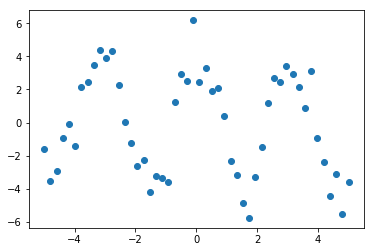

In [58]:
plt.plot(x_data, y_data, 'o')
plt.show()

In [69]:
#7
from scipy import optimize
cos_p, cos_c = optimize.curve_fit(lambda x, a, b : a*np.cos(b*x), x_data, y_data, p0 = [2,2])
sin_p, sin_c = optimize.curve_fit(lambda x, a, b : a*np.cos(b*x), x_data, y_data, p0 = [2,2])

print (cos_p)
print (cos_c)
print (sin_p)
print (sin_c)

[3.93165348 2.00961284]
[[5.07682762e-02 5.88875166e-05]
 [5.88875166e-05 4.66701940e-04]]
[3.93165348 2.00961284]
[[5.07682762e-02 5.88875166e-05]
 [5.88875166e-05 4.66701940e-04]]


In [6]:
#8
class1 = [65.9, 53.6, 57.3, 59.3, 63.8, 59.2, 64.2, 75.0, 62.9]
class2 = [76.3, 82.1, 73.3, 69.3, 59.9, 72.1, 59.1, 86.8, 78.1]

In [7]:
class1_loc = np.mean(class1)
class2_loc = np.mean(class2)

class1_var = np.var(class1)
class2_var = np.var(class2)

class1_std = np.std(class1)
class2_std = np.std(class2)

print(class1_loc, class1_var, class1_std)
print(class2_loc, class2_var, class2_std)

62.35555555555555 33.3046913580247 5.771021691002789
73.0 76.61777777777776 8.753158160217247


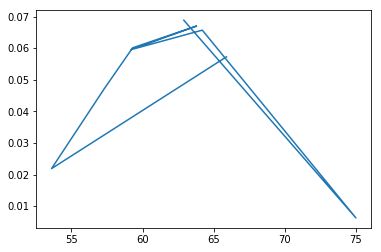

In [15]:
c1 = stats.norm.pdf(class1, class1_loc, class1_std)
plt.plot(class1,c1)

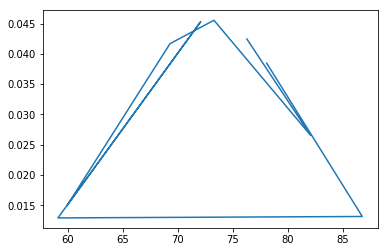

In [14]:
c2 = stats.norm.pdf(class2, class2_loc, class2_std)
plt.plot(class2,c2)